    Ben Christensen
    Math 405
    February 5, 2019

# Volume 3: Metropolis

In [38]:
import numpy as np
from scipy import stats
from math import sqrt, exp, log
from matplotlib import pyplot as plt
from time import time

## Problem 1

Write a function that accepts an integer $n$ and returns a random spin configuration for an $n \times n$ lattice (as an $n \times n$ NumPy array of $1$s and $-1$s).
Test your function with $n = 100$, plotting the spin configuration via `plt.imshow()`.

In [2]:
def random_lattice(n):
    """Construct a random spin configuration for an nxn lattice."""
    A = np.random.binomial(1, .5, (n,n))
    return np.where(A==0, A-1, A)

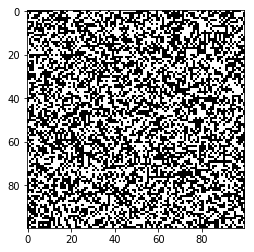

In [5]:
lattice = random_lattice(100)
plt.imshow(lattice, cmap='gray')
plt.show()

## Problem 2

Write a function that accepts a spin configuration $\sigma$ for a lattice as a NumPy array.
Compute the energy $H(\sigma)$ of the spin configuration.
Be careful to not double count site pair interactions!

In [51]:
def lattice_energy(L):
    """Computer the energy of the spin configuration corresponding to the
    lattice L.
    """
    return -((L*np.roll(L, 1, axis=0)).sum() + (L*np.roll(L, 1, axis=1)).sum())

## Problem 3

Write a function that accepts an integer $n$ and chooses a pair of indices $(i,j)$ where $0 \le i,j \le n-1$.
Each possible pair should have an equal probability $\frac{1}{n^2}$ of being chosen.

In [52]:
def flip_location(n):
    """Choose a random pair of indices 0 <= i,j <= n-1."""
    return np.random.randint(n), np.random.randint(n)

## Problem 4

Write a function that accepts a spin configuration $\sigma$, its energy $H(\sigma)$, and integer indices $i$ and $j$.
Compute the energy of the new spin configuration $\sigma^*$, which is $\sigma$ but with the spin flipped at the $(i,j)$th entry of the corresponding lattice.
Do not explicitly construct the new lattice for $\sigma^*$.

In [53]:
def updated_energy(L, L_energy, i, j):
    """Compute the energy of the spin configuration that results
    when the (i,j)th spin of L is flipped.
    """
    n = L.shape[0]
    return L_energy + 2*(L[i,j] * np.array([L[i,(j+1)%n], L[i, j-1], L[(i+1)%n, j], L[i-1, j]])).sum()



## Problem 5

Write a function that accepts a float $\beta$ and spin configuration energies $H(\sigma)$ and $H(\sigma^*)$.
Calculate whether or not the new spin configuration $\sigma^*$ should be accepted (return `True` or `False`).

In [54]:
def accept(beta, energy_old, energy_new):
    """Accept or reject the new spin configuration."""
    if energy_new < energy_old:
        return True
    elif np.random.uniform() <= np.exp(beta*(energy_old-energy_new)):
        return True
    else:
        return False

## Problem 6

Write a function that accepts a float $\beta>0$ and integers $n$, `n_samples`, and `burn_in`.
Initialize an $n\times n$ lattice for a spin configuration $\sigma$ using `random_lattice()`.
Use the Metropolis algorithm to (potentially) update the lattice `burn_in` times.
1. Use `flip_location()` to choose a site for possibly flipping the spin, thus defining a potential new configuration $\sigma^*$.
2. Use `updated_energy()` to calculate the energy $H(\sigma^*)$ of the proposed configuration.
3. Use `accept()` to accept or reject the proposed configuration. If it is accepted, set $\sigma = \sigma^*$ by flipping the spin at the indicated site.
4. Track $-\beta H(\sigma)$ at each iteration (independent of acceptance).

After the burn-in period, continue the iteration `n_samples` times, also recording every $100$th sample (to prevent memory failure).
Return the samples, the sequence of weighted energies $-\beta H(\sigma)$, and the acceptance rate.

Test your sampler on a $100 \times 100$ grid with $200000$ total iterations, with `n_samples` large enough so that you will keep $50$ samples, for $\beta = 0.2, 0.4, 1$.
Plot the proportional log probabilities, as well as a late sample from each test.


In [55]:
def ising_metropolis(beta, n=100, n_samples=5000, burn_in=195000):
    """Use the Metropolis algorithm to choose new spin configurations.

    Parameters:
        beta (float > 0): Constant inversely proportional to the temperature.
        N (int > 0): The size of the lattice.
        n_samples (int): The number of samples to generate.
        burnin (int): The number of iterations to burn before sampling.

    Returns:
        ((n_samples//100, n,n) ndarray): The sampled spin configurations.
        (n_samples) ndarray: The weighted energies of each configuration.
        (float): The proportion of proposed samples that were accepted.
    """
    L = random_lattice(n)
    energy = lattice_energy(L)
    w_energies = []
    for k in range(burn_in):
        i,j = flip_location(n)
        new_energy = updated_energy(L, energy, i, j)
        w_energies.append(-beta*energy)
        if accept(beta, energy, new_energy):
            L[i,j] *= -1
        energy = new_energy
    samples = []
    
    a_rates = []
    for k in range(n_samples):
        if k%100==0:
            samples.append(L.copy())
        i,j = flip_location(n)
        new_energy = updated_energy(L, energy, i, j)
        w_energies.append(-beta*energy)
        a_rates.append(np.exp(beta*(energy-new_energy)))
        if accept(beta, energy, new_energy):
            L[i,j] *= -1
        energy = new_energy
            
    return samples, w_energies, a_rates

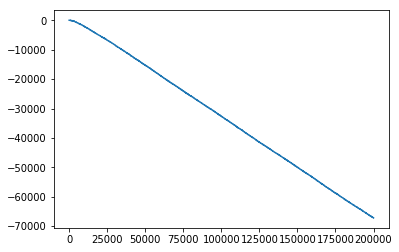

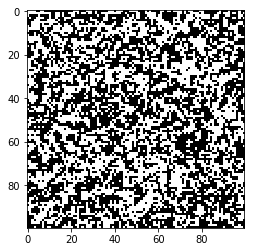

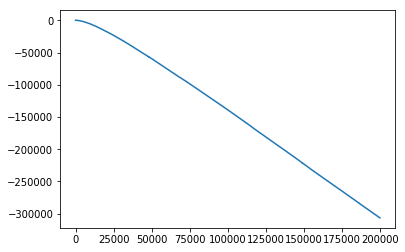

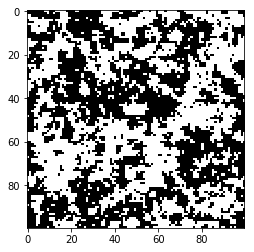

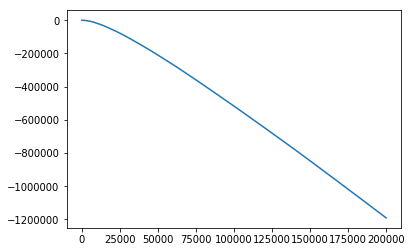

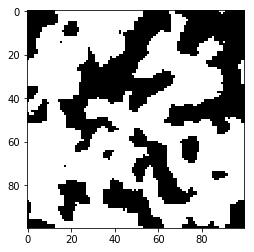

19.187959909439087


In [56]:
n_samples = 50*100
start = time()
for beta in [.2, .4, 1.]:
    samples, energies, rates = ising_metropolis(beta, 100, n_samples)
    plt.plot(energies)
    plt.show()
    plt.imshow(samples[-1], cmap='gray')
    plt.show()
print(time() - start)